In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

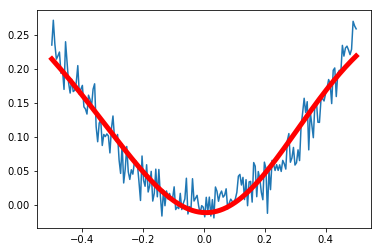

In [7]:
#使用numpy在-0.5到+0.5之间生成200个随机点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]   #前面的200个数据存储在“："，后面"np.newaxis" 相当于增加了一个维度。现在是一个200行1列的数据
noise=np.random.normal(0,0.02,x_data.shape)      #生成随机值作为噪声
y_data=np.square(x_data)+noise

#定义两个placeholder   根据样本来定义
x=tf.placeholder(tf.float32,[None,1])           #定义浮点型数据，”[None,1]“表明行不确定，列为1个列
y=tf.placeholder(tf.float32,[None,1])

#构建神经网络中间层
Weights_L1=tf.Variable(tf.random_normal([1,10]))
biases_L1=tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1=tf.matmul(x,Weights_L1)+biases_L1
L1=tf.nn.tanh(Wx_plus_b_L1)                      #双曲正切函数作为激活函数

#定义神经网络输出层
Weights_L2=tf.Variable (tf.random_normal([10,1]))
biases_L2=tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2=tf.matmul(L1,Weights_L2)+biases_L2
prediction=tf.nn.tanh(Wx_plus_b_L2)             

#二次代价函数
loss=tf.reduce_mean(tf.square(y-prediction))
#使用梯度下降法训练，学习率为0.1
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
#这里将2-4的两步和在一起写了。train.GradientDescentOptimizer(0.1)是一个优化器
#可以改为：optimizer=tf.train.GradientDescentOptimizer(0.1)  train_step=optimizer.minimize(loss)

with tf.Session() as sess:
    #变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})    #这里feed必须给x,y都给喂数据。因为train_step这一步里都需要x,y。一直往上找
        
    #获得预测值
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)                    #scatter 是画散点图
    plt.plot(x_data,prediction_value,'r-',lw=5)
    plt.show()